# Дашборд и презентация

Дашборд: https://public.tableau.com/app/profile/igor4812/viz/Book2_16522907313270/sheet2?publish=yes

Презентация: https://disk.yandex.ru/i/qXGP8-Qj_TOfOg

# Название проекта
Выделение групп пользователей на основе их поведения в мобильном приложении "Ненужные вещи".

# Описание проекта
Дерзкая и амбициозная команда сервиса «Ненужные вещи» жаждет увидеть в своём составе крутого аналитика, который возьмёт огромное количество наших данных и сотворит из них чудо. Конкретнее про чудо: наши пользователи совершают много действий в приложении, и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей. В ходе проекта необходимо проанализировать поведение пользователей в мобильном приложениии "Ненужные вещи" и кластеризировать их на основе их поведения, чтобы сделать более точный механизм взаимодействия с пользователями и повысить вовлеченность групп пользователей с низкими показателями.

# Декомпозиция
- Предобработка данных
- Исследовательский анализ данных EDA
   - Расчет Retention Rate
   - Изучить распределение событий по дням и неделям
   - Изучить кол-во событий по пользователям
   - Построение и сравнение конверсии воронки взаимодействия с основными карточками через поиск по сайту(+ по другим событиям)
   - Изучить количество взаимодействий в приложении и появление новых пользователей по дням и неделям, изучение среднего взаимодействия с событиями на одного пользователя по неделям(так как их 4, можно назвать их когортами наверное)
- Кластеризация   
   - Сформировать таблицу с признаками для кластеризации
   - Рассчитать показатели на каждого пользователя: продолжительность каждого сеанса, количество совершенных пользователем целевых действий, количество просмотров рекомендованных объявлений, добавление объявления в избранное, общее время использования приложения, время от начала регистрации до начала поиска по сайту
   - Построить графики распределения и матрицу корреляции признаков
   - Сегментировать пользователей на основе признаков с помощью кластеризации
   - Построить графики распределения признаков для кластеров и описать получившиеся кластеры
   - Ответить на вопросы:
      - Какие пользователи склонны часто возвращаться в мобильное приложение?
      - Какие пользователи часто делают целевое событие (contacts_show)
      - Как различается время между распространенными событиями пользователей, (например, различаются ли пользователи по группам на основе времени, которое проходит с момента первого использования мобильного приложения и до использования функции поиска)?
- Проверить статистические гипотезы
   - Проверить гипотезу: Конверсия в просмотр контактов между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается
   - Проверить гипотезу: Конверсия в использование поиска между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается
   - Проверить гипотезу: Конверсия в просмотр карты с объявлениями между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается
   - Проверить гипотезу: Конверсия в добавление объявления в избранное между пользователями, установившими приложение по ссылке из yandex и пользователями, установившими приложение по ссылке из google, различается
- Выводы и рекомендации
- Сделать презентацию и дашборд 

# Загрузка данных и библиотек
Загрузим библиотеки, отключим предупреждения об ошибках, потом загрузим данные и взглянем на дубликаты, пропуски и на сами данные.

In [45]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [46]:
# импорт данных 
# sources = pd.read_csv('/datasets/mobile_soures.csv')
# data = pd.read_csv('/datasets/mobile_dataset.csv')
sources = pd.read_csv('mobile_sourсes.csv')
data = pd.read_csv('mobile_dataset.csv')

А теперь взглянем на сами данные:

In [47]:
# первое впечатление о данных 
for i in [data, sources]:
    display(i.head())
    print(i.info())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None


А теперь на пропуски и дубликаты:

In [48]:
# пропуски
for i in [data, sources]:
    print(i.isna().sum())

event.time    0
event.name    0
user.id       0
dtype: int64
userId    0
source    0
dtype: int64


In [49]:
# дубликаты
for df in [data, sources]:
    print(df.duplicated().sum())

0
0


# Предобработка данных
Поменяем названия столбцов для удобства, отыщем проблемы в данных и решим их, например, contacts_show  и  show_contacts обозначают одно действие. Опишем данные, что в них входит, какие значения что означают.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.
Датасет mobile_dataset.csv содержит колонки:
- event.time  — время совершения
- event.name  — название события
- user.id  — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки:
- userId  — идентификатор пользователя
- source  — источник, с которого пользователь установил приложение

Расшифровки событий:
- advert_open  — открытие карточки объявления
- photos_show  — просмотр фотографий в объявлении
- tips_show  — пользователь увидел рекомендованные объявления
- tips_click  — пользователь кликнул по рекомендованному объявлению
- contacts_show  и  show_contacts  — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- contacts_call  — пользователь позвонил по номеру телефона на карточке объявления
- map  — пользователь открыл карту размещенных объявлений
- search_1 - search_7  — разные события, связанные с поиском по сайту
- favorites_add  — добавление объявления в избранное

Переименуем столбцы:

In [50]:
# меняем названия столбцов
data.columns = ['event_time', 'event_name', 'user_id']
sources.columns = ['user_id', 'source']
for i in [data, sources]:
    display(i.head())

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Приведем столбец event_time к формату даты и округлим данные до 1 секунды:

In [51]:
# приведем столбец event_time к формату даты и округлим данные до 1 секунды
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
data.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Проверим кол-во пользователей в датасетах и склеим их по столбцу 'user_id':

In [52]:
for i in [data, sources]:
    display(len(i['user_id'].unique()))

4293

4293

In [53]:
data = data.merge(sources, on='user_id', how = 'right')
data.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


Теперь заменим  значения contacts_show и show_contacts, а также seacrh_7 и seacrh_1:

In [54]:
# функция для замены
def events_type(i):
    if i == 'show_contacts':
        new_name = 'contacts_show'
        return new_name
    elif 'search' in i:
        new_name = 'search'
        return new_name
    return i

# применим фукнцию и проверим результат
data['event_name'] = data['event_name'].apply(events_type)
data['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'tips_click', 'search',
       'contacts_show', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

Выделим из столбцов с датами час, неделю, месяц, год и полную дату в отдельные столбцы:

In [55]:
data['event_hour'] = data['event_time'].dt.hour
data['event_week'] = data['event_time'].astype('datetime64[W]')
data['event_month'] = data['event_time'].astype('datetime64[M]')
data['event_year'] = data['event_time'].astype('datetime64[Y]')
data['event_date'] = data['event_time'].astype('datetime64[D]')
data.head()

,event_time,event_name,user_id,source,event_hour,event_week,event_month,event_year,event_date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,0,2019-10-03,2019-10-01,2019-01-01,2019-10-07


# Исследовательский анализ данных
Посмотрим, сколько раз было совершено каждое действие:

In [56]:
data.groupby('event_name').agg({'user_id' : 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
tips_show,40055
photos_show,10012
search,6784
advert_open,6164
contacts_show,4529
map,3881
favorites_add,1417
tips_click,814
contacts_call,541


Посмотрим на количество пользователей, пришедших из каждого источника:

In [57]:
data.groupby('source').agg({'user_id' : 'nunique'}).sort_values(by='user_id', ascending=False)

,user_id
source,
yandex,1934
other,1230
google,1129


Данными за какой период мы обладаем:

In [58]:
print(f'У нас события за период с {data["event_date"].min().date()} по {data["event_date"].max().date()}')

У нас события за период с 2019-10-07 по 2019-11-03


Посчитаем количество событий по дням для каждого пользователя и построим график распределения событий по дням:

,event_date,user_id
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


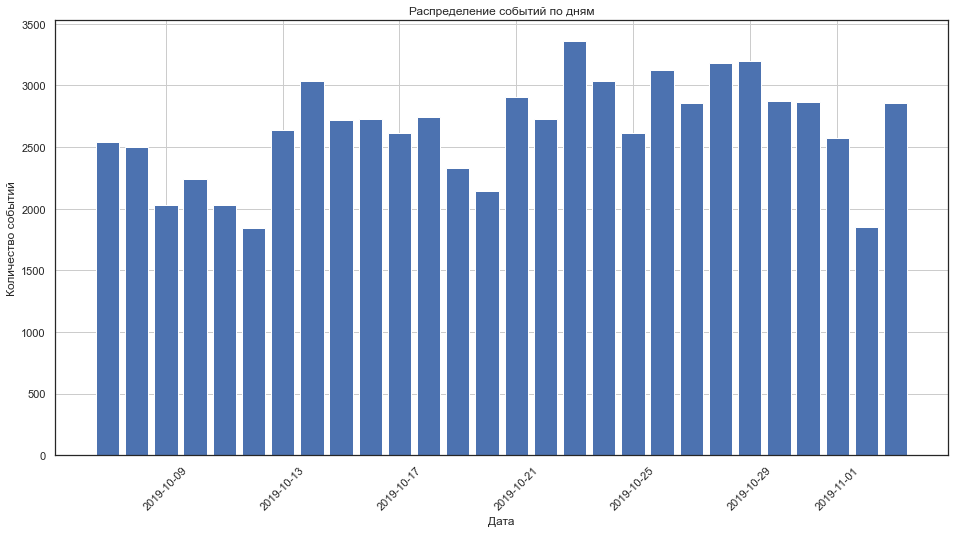

In [59]:
events_by_day = data.groupby('event_date', as_index=False).agg({'user_id':'count'})
display(events_by_day.head())
plt.figure(figsize=(16, 8))
plt.bar(events_by_day['event_date'], events_by_day['user_id'])
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по дням')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

Таким образом у нас есть:
- данные за период с 07.10.2019 по 03.11.2019

Условно данные можно разбить на 4 недели:
- 1 неделя - с 07.10.2019 по 13.10.2019
- 2 неделя - с 14.10.2019 по 20.10.2019
- 3 неделя - с 21.10.2019 по 27.10.2019
- 4 неделя - с 28.10.2019 по 03.11.2019

Больше всего событий совершено 23.10.2019 - чуть меньше 3500 событий;
Меньше всего событий совершено 12.12.2019 - чуть меньше 2000 событий;
Намечается тенденция: просадки происходят в выходные дни - 12.10.2019 и 02.11.2019 - оба эти дня приходятся на субботу, в последние выходные дни октября активность больше, чем в остальные выходные. Вероятно, это связано с получением пользователями зарплаты или премии, и желанием потратить эти средства на новые вещи.
В целом, данные распределены равномерно, аномалий нет.

Теперь посмотрим на график накопительного распределения количества событий по дням на каждый источник:

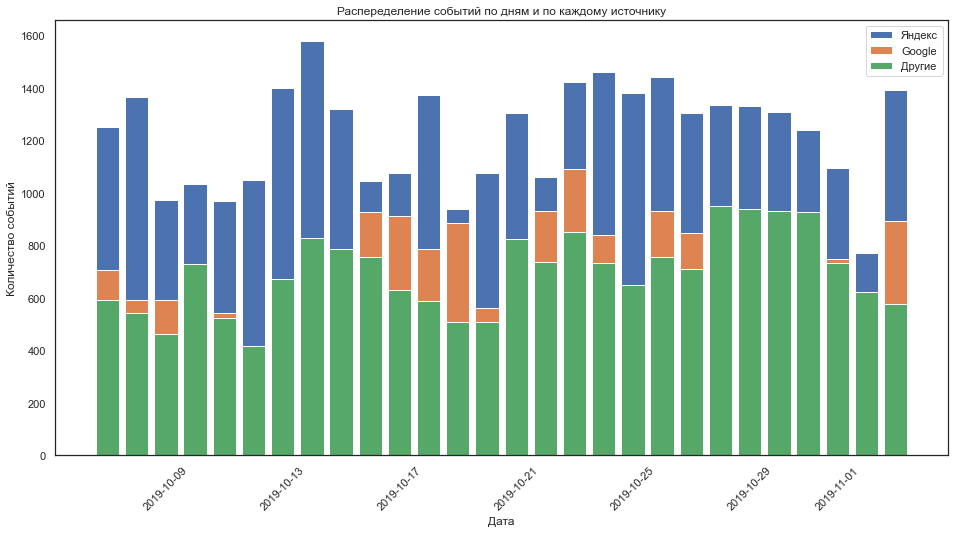

In [60]:
yandex_by_day = data.query('source == "yandex"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

google_by_day = data.query('source == "google"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

other_by_day = data.query('source == "other"')\
.groupby('event_date', as_index=False).agg({'user_id':'count'})

plt.figure(figsize=(16, 8))
plt.bar(yandex_by_day['event_date'], yandex_by_day['user_id'])
plt.bar(google_by_day['event_date'], google_by_day['user_id'])
plt.bar(other_by_day['event_date'], other_by_day['user_id'])
plt.title('Распеределение событий по дням и по каждому источнику')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.legend(['Яндекс', 'Google', 'Другие'])
plt.xticks(rotation=45)
plt.show();

Визуально можно сказать, что неизвестные источники более популярны среди пользователей совершающие действия в нашем приложении. Из известных источников больше всего событий совершают пользователи, пришедшие через Яндекс. Распределение в целом очень похоже на распределение без разбивки по источникам.

Посмотрим на распредения событий по дням:

,week_day,event_time
1,Monday,11671
5,Tuesday,11145
6,Wednesday,10994
4,Thursday,10763
3,Sunday,10501
0,Friday,9969
2,Saturday,9154


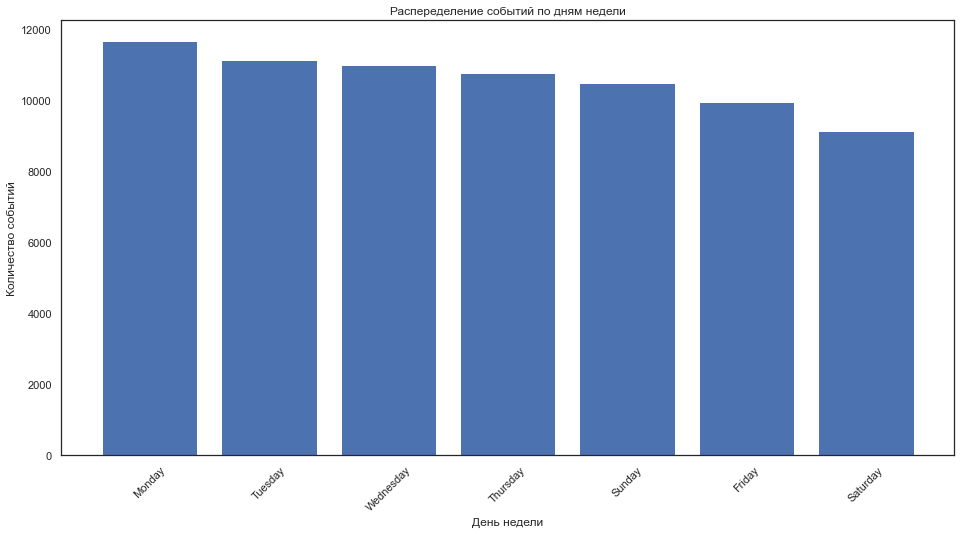

In [61]:
# добавим информацию с текстовой датой совершения событий
data['week_day'] = data['event_date'].apply(lambda x: calendar.day_name[x.weekday()])
# посчиатем, сколько событий происходит с разбивкой по дням недели и нарисуем график
events_per_week = data.groupby('week_day', as_index=False).agg({'event_time':'count'}).sort_values(by='event_time', ascending=False)

display(events_per_week)
plt.figure(figsize=(16, 8))
plt.bar(events_per_week['week_day'], events_per_week['event_time'])
plt.title('Распеределение событий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show();

Можно заметить, что с течением недели количество операций в нашем приложении падает, в понедельник больше всего операций, а в субботу меньше всего. В воскресенье количество операций на уровне четверга-пятницы.

Теперь посчитаем количество событий на одного пользователя, нарисуем гистограмму и ящик с усами для оценки распределения.

In [62]:
events_per_user = (data\
                   .groupby(['user_id'], as_index=False)\
                   .agg({'event_time':'count'})\
                   .rename(columns={'event_time':'event_count'}))
display(events_per_user.head())
print(events_per_user['event_count'].describe())

,user_id,event_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8


count   4293.00
mean      17.28
std       29.13
min        1.00
25%        5.00
50%        9.00
75%       17.00
max      478.00
Name: event_count, dtype: float64


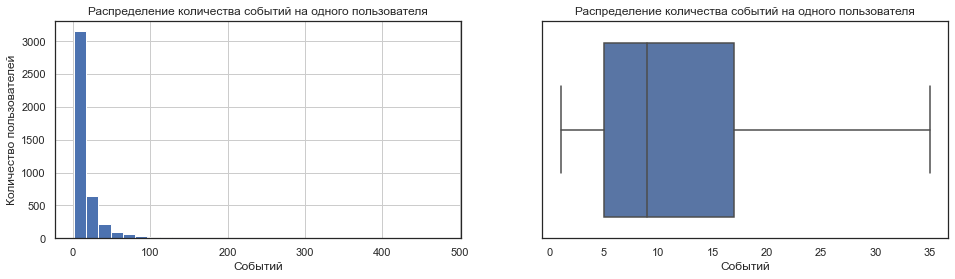

In [63]:
fig, ax = plt.subplots(figsize = (16, 4))
events_per_user['event_count'].hist(bins=30, ax = plt.subplot(1, 2, 1))
plt.title('Распределение количества событий на одного пользователя')
plt.xlabel('Cобытий')
plt.ylabel('Количество пользователей')
sns.boxplot(events_per_user['event_count'], showfliers=False, ax = plt.subplot(1, 2, 2))
plt.title('Распределение количества событий на одного пользователя')
plt.xlabel('Cобытий')
plt.ylabel('')
plt.show()

В распределении количества событий на пользователя есть выбросы. В основном, каждый пользователь совершает от 5 до 17 событий. Все, что лежит вне  значений примем за аномальные значения, если мы их уберем, то потеряем 5% данных, что допустимо.

Кол-во строк до фильтрации 4293
Кол-во строк после фильтрации 4083


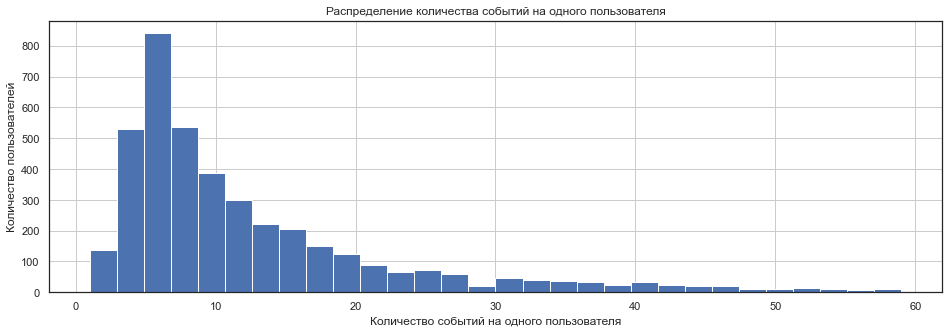

count   4083.00
mean      12.38
std       10.69
min        1.00
25%        5.00
50%        8.00
75%       15.00
max       59.00
Name: event_count, dtype: float64

In [64]:
right_cut = events_per_user.event_count.quantile(0.95)
events_per_user_filtered = events_per_user.query('event_count <= @right_cut')
print('Кол-во строк до фильтрации',len(events_per_user))
print('Кол-во строк после фильтрации',len(events_per_user_filtered))
plt.figure(figsize=(16, 5))
events_per_user_filtered['event_count'].hist(bins=30)
plt.title('Распределение количества событий на одного пользователя')
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('Количество пользователей')
plt.show()
events_per_user_filtered['event_count'].describe()

Больше убрать данных мы не можем, такое распределение уже ближе к нормальному. Посчитаем продолжительность сессии каждого пользователя в приложении:

In [65]:
sess_data = data[['user_id', 'event_name', 'event_time']]
#sess_data.head()

In [66]:
g = (sess_data.groupby('user_id')['event_time'].diff() > pd.Timedelta('60min')).cumsum()
sess_data['session_id'] = sess_data.groupby(['user_id', g], sort=False).ngroup()+1
# начало сессии
user_time_min = sess_data.groupby(['session_id','user_id']).agg({'event_time':'min'})\
.rename(columns={'event_time':'event_time_start'})
# конец сессии
user_time_max = sess_data.groupby(['session_id','user_id']).agg({'event_time':'max'})\
.rename(columns={'event_time':'event_time_stop'})

In [67]:
# объединим столбцы с временем начала и окончания сессии для пользователей
user_time =  pd.merge(user_time_min, user_time_max, on=['user_id', 'session_id'])
# посчитаем, cколько длилась сессия и переведем в минуты
user_time['time_spent'] = (user_time['event_time_stop'] - user_time['event_time_start']).astype('timedelta64[s]') / 60
display(user_time.head(15))
user_time['time_spent'].describe()

event_time_start  \
user_id                              session_id                       
020292ab-89bc-4156-9acf-68bc2783f894 1          2019-10-07 00:00:00   
cf7eda61-9349-469f-ac27-e5b6f5ec475c 2          2019-10-07 00:00:02   
                                     3          2019-10-08 20:06:42   
                                     4          2019-10-10 19:43:23   
                                     5          2019-10-16 21:17:07   
                                     6          2019-10-18 01:11:35   
                                     7          2019-10-21 22:57:26   
                                     8          2019-10-30 23:34:26   
8c356c42-3ba9-4cb6-80b8-3f868d0192c3 9          2019-10-07 00:02:07   
                                     10         2019-10-17 21:48:10   
                                     11         2019-10-23 23:28:29   
                                     12         2019-10-29 23:10:19   
d9b06b47-0f36-419b-bbb0-3533e582a6cb 13         2019-10-07 00:05:20   
                                     14         2019-10-10 15:45:36   
                                     15         2019-10-26 10:42:37   

                                                    event_time_stop  \
user_id                              session_id                       
020292ab-89bc-4156-9acf-68bc2783f894 1          2019-10-07 00:18:43   
cf7eda61-9349-469f-ac27-e5b6f5ec475c 2          2019-10-07 00:41:40   
                                     3          2019-10-08 20:19:08   
                                     4          2019-10-10 20:12:33   
                                     5          2019-10-16 22:02:51   
                                     6          2019-10-18 01:14:43   
                                     7          2019-10-21 23:26:45   
                                     8          2019-10-30 23:39:24   
8c356c42-3ba9-4cb6-80b8-3f868d0192c3 9          2019-10-07 00:30:22   
                                     10         2019-10-17 22:50:03   
                                     11         2019-10-23 23:37:58   
                                     12         2019-10-29 23:43:51   
d9b06b47-0f36-419b-bbb0-3533e582a6cb 13         2019-10-07 00:05:23   
                                     14         2019-10-10 15:47:43   
                                     15         2019-10-26 10:42:56   

                                                 time_spent  
user_id                              session_id              
020292ab-89bc-4156-9acf-68bc2783f894 1                18.72  
cf7eda61-9349-469f-ac27-e5b6f5ec475c 2                41.63  
                                     3                12.43  
                                     4                29.17  
                                     5                45.73  
                                     6                 3.13  
                                     7                29.32  
                                     8                 4.97  
8c356c42-3ba9-4cb6-80b8-3f868d0192c3 9                28.25  
                                     10               61.88  
                                     11                9.48  
                                     12               33.53  
d9b06b47-0f36-419b-bbb0-3533e582a6cb 13                0.05  
                                     14                2.12  
                                     15                0.32

count   9573.00
mean      17.52
std       28.54
min        0.00
25%        0.73
50%        6.82
75%       21.75
max      434.98
Name: time_spent, dtype: float64

Можно видеть, что среднее время сессии 18 минут, но есть пользователи засиживающиеся у нас и по 7 часов. Теперь нарисуем воронку по действиям пользователей

## Воронка пользователей

In [68]:
#tips_click = data.query('event_name == "tips_show"')
#tips_click_users_list = tips_click['user_id'].unique().tolist()
#search = data.query('event_name == "search"')
#search_users_list = search['user_id'].unique().tolist()
#search_voronka = data.query('user_id not in @tips_click_users_list')
#search_voronka = search_voronka.query('user_id in @search_users_list')

voronka = data.groupby('event_name').agg({
    'event_date': 'count',
    'user_id': 'nunique'
}).sort_values(by='user_id', ascending=False)
voronka['% уникальных от всех уникальных'] = voronka['user_id']/data['user_id'].nunique()
voronka = voronka.rename(columns={'event_date': 'кол-во', 'user_id': 'уникальные'})
voronka

,кол-во,уникальные,% уникальных от всех уникальных
event_name,,,
tips_show,40055,2801,0.65
search,6784,1666,0.39
map,3881,1456,0.34
photos_show,10012,1095,0.26
contacts_show,4529,981,0.23
advert_open,6164,751,0.17
favorites_add,1417,351,0.08
tips_click,814,322,0.08
contacts_call,541,213,0.05


По общей воронке можно сказать, что скорее всего при входе в приложение пользователю сразу показываются рекомендации. Этот факт поможет нам в будущем для определения времени потраченного пользователем от начала использования приложения до поиска. Чтобы воронка заканчивалась целевым событием, уберем события ниже него: "advert_open", "favorites_add", "contacts_call", "tips_click". Добавим информацию о конверсии в шаг.

In [69]:
voronka = voronka.query('event_name != "advert_open" and event_name != "favorites_add" and event_name != "contacts_call" and event_name != "tips_click"')
voronka['conv'] = voronka['уникальные']/voronka['уникальные'].values[0]
voronka['prev_step'] = voronka['уникальные'].shift()
voronka['step_conv'] = voronka['уникальные']/voronka['prev_step']#конверсия в следующий шаг
voronka

,кол-во,уникальные,% уникальных от всех уникальных,conv,prev_step,step_conv
event_name,,,,,,
tips_show,40055,2801,0.65,1.00,NaN,NaN
search,6784,1666,0.39,0.59,2801.00,0.59
map,3881,1456,0.34,0.52,1666.00,0.87
photos_show,10012,1095,0.26,0.39,1456.00,0.75
contacts_show,4529,981,0.23,0.35,1095.00,0.90


Нарисуем нашу воронку:

In [70]:
fig = go.Figure(
    go.Funnel(
        y= voronka['уникальные'].index,
        x= voronka['уникальные'].values,
        textposition = "auto",
        textinfo = "value+percent initial+percent previous"
    )
)
fig.update_layout(title='Воронка взаимодействий пользователей, кто воспользовался только поисковой системой')
fig.show()

- После просмотра рекомендаций 59% пользователей переходят в поиск.
- После поиска 87% пользователей просматривают карту и 52% от общего количества просмотра рекомендаций
- После открытия карты объявлений 75% пользователей открывают фотографии объявления и 39% от общего кол-ва поисковых действий
- Пользователи, которые смотрят номер телефона составляют 35% от общего кол-ва просмотренных рекомендаций, но от посмотревших фотографии 90%.

После всего этого меня осенило, что в нашем приложении можно смотреть номер телефона в ленте карточек(поиска или рекомендаций) и тогда промежуточных действий может не быть и условно воронка может быть и скорее всего такой и является: tips_show -> search -> contacts_show или еще меньше: tips_show -> contacts_show. К огромному сожалению у нас нет User flow пользователя, с ним была бы полная картина происходящего в приложении со стороны пользователя. Посмотрим на еще две возможные воронки:

In [71]:
voronka_1 = data.query('event_name == "tips_show" or event_name == "search" or event_name == "contacts_show"').groupby('event_name').agg({
    'event_date': 'count',
    'user_id': 'nunique'
}).sort_values(by='user_id', ascending=False)
voronka_1['% уникальных от всех уникальных'] = voronka_1['user_id']/data['user_id'].nunique()
voronka_1 = voronka_1.rename(columns={'event_date': 'кол-во', 'user_id': 'уникальные'})
voronka_1['conv'] = voronka_1['уникальные']/voronka_1['уникальные'].values[0]
voronka_1['prev_step'] = voronka_1['уникальные'].shift()
voronka_1['step_conv'] = voronka_1['уникальные']/voronka_1['prev_step']#конверсия в следующий шаг
voronka_1

,кол-во,уникальные,% уникальных от всех уникальных,conv,prev_step,step_conv
event_name,,,,,,
tips_show,40055,2801,0.65,1.00,NaN,NaN
search,6784,1666,0.39,0.59,2801.00,0.59
contacts_show,4529,981,0.23,0.35,1666.00,0.59


In [72]:
voronka_2 = data.query('event_name == "tips_show" or event_name == "contacts_show"').groupby('event_name').agg({
    'event_date': 'count',
    'user_id': 'nunique'
}).sort_values(by='user_id', ascending=False)
voronka_2['% уникальных от всех уникальных'] = voronka_2['user_id']/data['user_id'].nunique()
voronka_2 = voronka_2.rename(columns={'event_date': 'кол-во', 'user_id': 'уникальные'})
voronka_2['conv'] = voronka_2['уникальные']/voronka_2['уникальные'].values[0]
voronka_2['prev_step'] = voronka_2['уникальные'].shift()
voronka_2['step_conv'] = voronka_2['уникальные']/voronka_2['prev_step']#конверсия в следующий шаг
voronka_2

,кол-во,уникальные,% уникальных от всех уникальных,conv,prev_step,step_conv
event_name,,,,,,
tips_show,40055,2801,0.65,1.00,NaN,NaN
contacts_show,4529,981,0.23,0.35,2801.00,0.35


Таким образом, посмотрели еще две возможные воронки, по которым конверсия в целевое действие от общего числа составила 35% пользователей, но в воронке с поиском переход из поиска в просмотр контактов 60%.

# Кластеризация
Сформируем для начала таблицу с признаками для кластеризации наших пользователей

In [73]:
# features - таблица с признаками
# добавим в нее среднее время продолжительности сессии для каждого пользователя и 
# число сессий для каждого пользователя
features = user_time.groupby('user_id').agg({'time_spent':'mean', 'event_time_stop':'count'})\
.rename(columns={'event_time_stop':'visits'})
features.head()

,time_spent,visits
user_id,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.50,4
00157779-810c-4498-9e05-a1e9e3cedf93,32.71,6
00463033-5717-4bf1-91b4-09183923b9df,24.72,1
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,18.46,6
00551e79-152e-4441-9cf7-565d7eb04090,3.11,3


Напишем функцию которая будет добавлять информацию об интересующем нас признаке в таблицу features:

In [74]:
features_list = data['event_name'].unique()
def dobavka(df, features, df_new):
    df1 = df.query('event_name == @features')\
    .groupby('user_id', as_index=False)\
    .agg({'event_name':'count'})\
    .rename(columns={'event_name': features})
    df_new = pd.merge(df_new, df1, on='user_id', how='left')
    return df_new
for i in features_list:
    features = dobavka(data, i, features)

features = features.fillna(0)
features.head()

,user_id,time_spent,visits,advert_open,tips_show,map,tips_click,search,contacts_show,photos_show,favorites_add,contacts_call
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.50,4,0.00,29.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00157779-810c-4498-9e05-a1e9e3cedf93,32.71,6,2.00,0.00,0.00,0.00,18.00,11.00,33.00,2.00,5.00
2,00463033-5717-4bf1-91b4-09183923b9df,24.72,1,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,18.46,6,5.00,4.00,6.00,0.00,17.00,0.00,0.00,0.00,0.00
4,00551e79-152e-4441-9cf7-565d7eb04090,3.11,3,0.00,0.00,0.00,0.00,1.00,3.00,1.00,0.00,3.00


Теперь посмотрим на корреляцию признаков и на статистические показатели признаков:

In [75]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent,4293.00,18.39,22.54,0.00,4.69,10.95,23.92,269.62
visits,4293.00,2.23,3.00,1.00,1.00,1.00,2.00,72.00
advert_open,4293.00,1.44,6.16,0.00,0.00,0.00,0.00,137.00
tips_show,4293.00,9.33,19.88,0.00,0.00,4.00,10.00,346.00
map,4293.00,0.90,3.04,0.00,0.00,0.00,1.00,71.00
tips_click,4293.00,0.19,1.04,0.00,0.00,0.00,0.00,30.00
search,4293.00,1.58,3.78,0.00,0.00,0.00,2.00,68.00
contacts_show,4293.00,1.05,4.99,0.00,0.00,0.00,0.00,137.00
photos_show,4293.00,2.33,8.39,0.00,0.00,0.00,1.00,177.00
favorites_add,4293.00,0.33,2.11,0.00,0.00,0.00,0.00,63.00


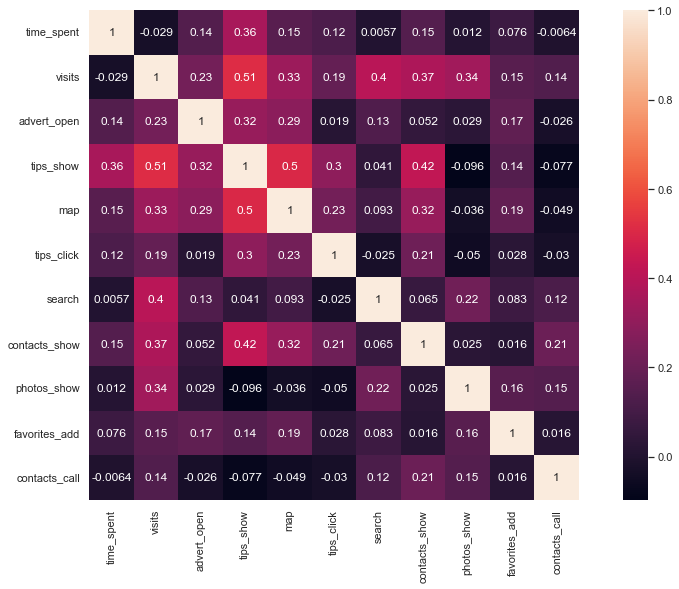

In [76]:
cm = features.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(16, 9))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
    
plt.show()

Заметна достаточно сильная корреляция с целевой переменной contacts_show у признаков: 
- visits — общее количество посещений
- tips_show  — пользователь увидел рекомендованные объявления
- map  — пользователь открыл карту размещенных объявлений
- tips_click  — пользователь кликнул по рекомендованному объявлению
- contacts_call  — пользователь позвонил по номеру телефона на карточке объявления

Предполагаю, что с этим связана общая заинтересованность пользователей приложением и логично, что более заинтересованного в нашем приложении пользователя будет интересовать просмотр контактов. По всем остальным признакам можно сказать, что корреляции нет или она очень мала. 
Теперь стандартизируем данные, а потом построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.

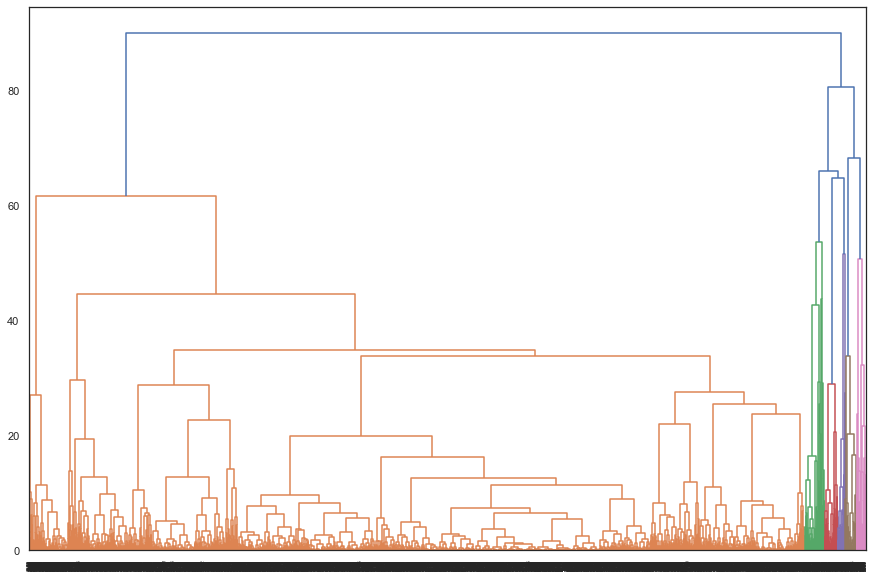

In [77]:
#выделим данные для кластеризации, 'tips_show' уберем, так как это событие не влияет на поведение пользователей 
X = features.drop(['user_id', 'contacts_show','tips_show'], axis=1)#,'tips_show' 

#стандартизируем
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#строим таблицу расстояний между объектами
linked = linkage(X_sc, method = 'ward') 

#визуализируем
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Разобьём данные на 3 кластера, желтая часть получилась в несколько раз больше других. Теперь обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [78]:
km = KMeans(n_clusters = 3, random_state = 1)

#спрогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

#метки кластера в поле нашего датасета
features['km_cluster'] = labels

#статистика по средним значениям наших признаков по кластеру
display(features.groupby('km_cluster').agg('mean').T)
print('Размеры кластеров')
display(features.groupby('km_cluster').agg(count=('user_id','count')))

#метрика силуэта для нашей кластеризации
print('Silhouette_score (метрика силуэта): {:.2f}'.format(silhouette_score(X_sc, labels)))

km_cluster,0,1,2
time_spent,17.50,45.94,21.69
visits,1.87,8.80,9.89
advert_open,0.80,21.74,2.95
tips_show,7.65,70.70,2.06
map,0.67,9.04,0.43
tips_click,0.12,2.64,0.02
search,1.30,3.86,11.36
contacts_show,0.76,8.12,4.91
photos_show,1.64,0.00,37.87
favorites_add,0.22,2.48,2.39


Размеры кластеров


,count
km_cluster,
0,4084
1,122
2,87


Silhouette_score (метрика силуэта): 0.74


Посмотрим на распределения признаков и опишем данные:

In [79]:
features.query('km_cluster == 0').describe()

,time_spent,visits,advert_open,tips_show,map,tips_click,search,contacts_show,photos_show,favorites_add,contacts_call,km_cluster
count,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00,4084.00
mean,17.50,1.87,0.80,7.65,0.67,0.12,1.30,0.76,1.64,0.22,0.07,0.00
std,21.27,1.60,2.68,12.75,1.41,0.56,2.41,3.08,4.28,1.24,0.39,0.00
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,10.42,1.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,22.45,2.00,0.00,10.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
max,252.15,25.00,33.00,188.00,19.00,7.00,25.00,69.00,45.00,21.00,5.00,0.00


Самая большая когорта у нас самая малоактивная, у них и время в приложении маленькое, и все остальные признаки в среднем близки к нулю. Эта когорта приходит в наше приложение, не находит нужных им вещей и больше не приходят в наше приложение, а также у них медианное значение просмотров рекомендаций равно четырем. 

In [80]:
features.query('km_cluster == 1').describe()

,time_spent,visits,advert_open,tips_show,map,tips_click,search,contacts_show,photos_show,favorites_add,contacts_call,km_cluster
count,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00
mean,45.94,8.80,21.74,70.70,9.04,2.64,3.86,8.12,0.00,2.48,0.00,1.00
std,41.65,10.06,24.91,66.72,13.66,4.66,7.26,21.85,0.00,8.75,0.00,0.00
min,1.20,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,21.66,2.00,0.00,30.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,35.70,5.00,17.00,50.50,4.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,53.44,11.00,35.75,89.00,10.00,3.75,4.00,5.00,0.00,0.00,0.00,1.00
max,269.62,72.00,137.00,346.00,71.00,30.00,48.00,137.00,0.00,63.00,0.00,1.00


Вторая когорта, тут собраны пользователи, которые в разы чаще совершают все события. Видимо эта когорта с самыми лояльными для нас пользователями.

In [81]:
features.query('km_cluster == 2').describe()

,time_spent,visits,advert_open,tips_show,map,tips_click,search,contacts_show,photos_show,favorites_add,contacts_call,km_cluster
count,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00
mean,21.69,9.89,2.95,2.06,0.43,0.02,11.36,4.91,37.87,2.39,2.94,2.00
std,17.40,7.59,8.45,14.25,2.73,0.21,15.94,5.53,36.49,5.52,3.71,0.00
min,0.57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,10.77,4.50,0.00,0.00,0.00,0.00,0.50,0.00,9.50,0.00,0.00,2.00
50%,15.54,8.00,0.00,0.00,0.00,0.00,3.00,3.00,31.00,0.00,2.00,2.00
75%,26.05,13.00,1.00,0.00,0.00,0.00,17.50,7.50,58.00,1.00,5.00,2.00
max,98.78,38.00,65.00,129.00,23.00,2.00,68.00,28.00,177.00,37.00,17.00,2.00


Самая малочисленная когорта тоже имеет небольшие отличия от предыдущих в поведении, они заходят и в отличие от первой когорты, проходят по некоторым объявлениям, больше смотрят на целевую переменную, и соответственно и времени проводят больше в приложении. В основном они пользуются поиском, больше всех из трех когорт, очень часто рассматривают фотографии тоже больше всех.

In [82]:
data = pd.merge(data, features, on='user_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_time     74197 non-null  datetime64[ns]
 1   event_name     74197 non-null  object        
 2   user_id        74197 non-null  object        
 3   source         74197 non-null  object        
 4   event_hour     74197 non-null  int64         
 5   event_week     74197 non-null  datetime64[ns]
 6   event_month    74197 non-null  datetime64[ns]
 7   event_year     74197 non-null  datetime64[ns]
 8   event_date     74197 non-null  datetime64[ns]
 9   week_day       74197 non-null  object        
 10  time_spent     74197 non-null  float64       
 11  visits         74197 non-null  int64         
 12  advert_open    74197 non-null  float64       
 13  tips_show      74197 non-null  float64       
 14  map            74197 non-null  float64       
 15  tips_click     7419

## Retention Rate
Рассчитаем Retention Rate для каждой из когорт по неделям:

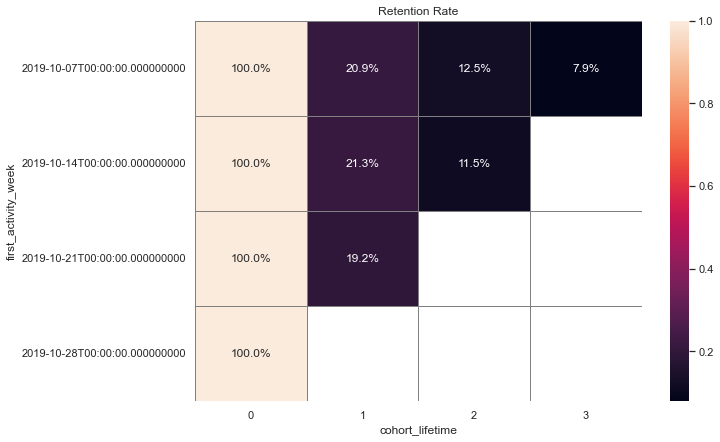

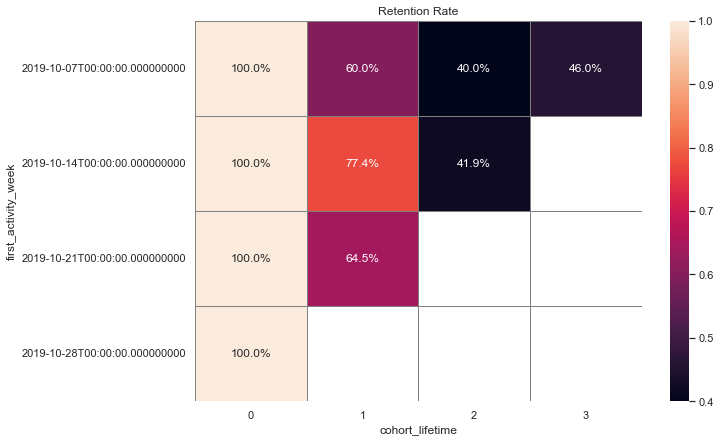

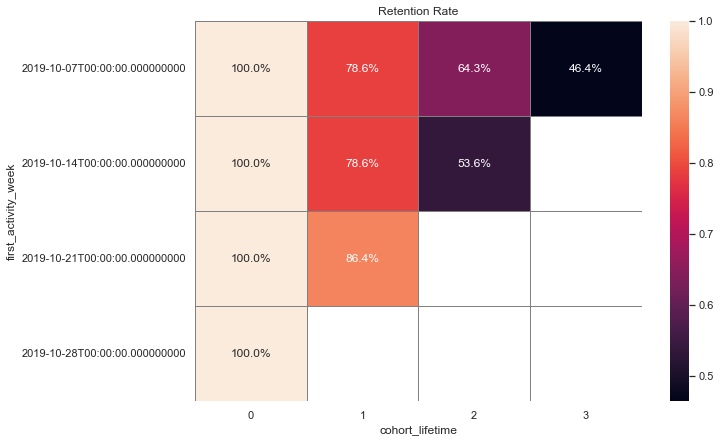

In [83]:
for i in range(0,3):
    first_activity_date = data.loc[data['km_cluster']==i].groupby(['user_id'])['event_date'].min()
    first_activity_date.name = 'first_activity_date'
    user_activity = data.loc[data['km_cluster']==i].join(first_activity_date,on='user_id')
    user_activity['activity_week'] = pd.to_datetime(user_activity['event_date'],
                                                unit='d') - pd.to_timedelta(user_activity['event_date'].dt.dayofweek, unit='d')
    user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date'],
                                                      unit='d') - pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, unit='d')
    user_activity['cohort_lifetime'] = user_activity['activity_week'] - user_activity['first_activity_week']
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'W')
    user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)
    cohorts = user_activity.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
    initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
    cohorts = cohorts.merge(initial_users_count,on='first_activity_week')
    cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']
    retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum')

    sns.set(style='white')
    plt.figure(figsize=(10, 7))
    plt.title('Retention Rate')
    sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

У нас есть две когорты с очень хорошим удержанием, номер 1 и 2, у них почти схожие показатели удержания. Но группа поменьше возвращается к нам почаще, видимо это связано с тем, что они никак не могу найти желаемые вещи и периодически приходят к нам обратно. Это может объяснить и частое использование поиска в когорте номер 2. 

##  Изучение длительности с момента взаимодействия с tips_show до начала поиска
Посмотрим на то, как пользователи разных когорт переходят с рекомендаций в поиск в нашем приложении. Вопрос стоял так: Как различается время между распространенными событиями пользователей, (например, различаются ли пользователи по группам на основе времени, которое проходит с момента первого использования мобильного приложения и до использования функции поиска)?

Я посмотрел на общую воронку пользователей и решил что за начало отсчета пользования приложением можно считать событие tips_show, 65% уникальных пользователей здесь оказывается, поэтому логика такая: начало использования приложения является событие tips_show.

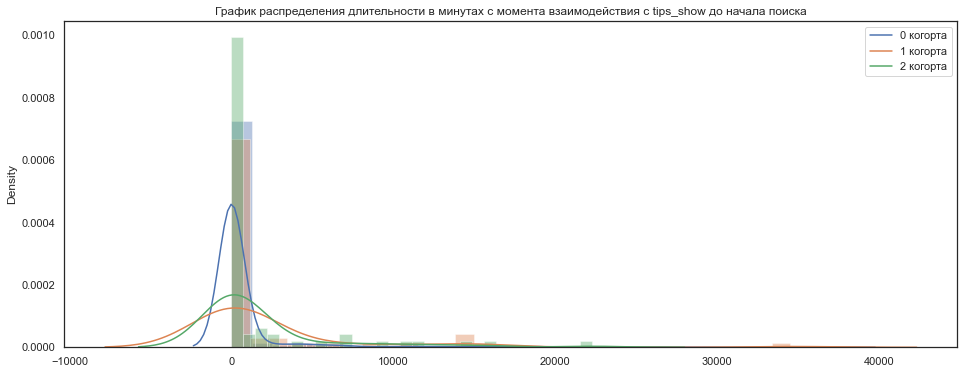

,count,mean,std,min,25%,50%,75%,max
km_cluster,,,,,,,,
0,1541.00,835.27,3391.18,0.00,0.00,0.00,1.12,37418.68
1,60.00,2360.85,5893.70,0.00,0.00,10.07,653.70,34527.07
2,65.00,1889.98,4403.17,0.00,0.00,0.00,1087.05,22264.48


In [84]:
# search_users = user_activity.query('user_id not in @tips_click_users_list')
# search_users = search_users.query('user_id in @search_users_list')
search_min_time = data.query('event_name =="search"').groupby(['user_id']).agg({'event_time':'min'}).sort_values(by='event_time')
min_time = data.groupby(['user_id']).agg({'event_time':'min'}).sort_values(by='event_time')
search_time = min_time.merge(search_min_time, on ='user_id', how='right')
search_time.columns=['min_time', 'search_time']
search_time['td'] = search_time['search_time'] - search_time['min_time']
search_time['td'] = search_time['td'] / np.timedelta64(1,'m')
search_time = data.merge(search_time, on=['user_id'], how='right')
search_time = search_time[['user_id', 'km_cluster', 'td']]
search_time = search_time.drop_duplicates('user_id')
plt.figure(figsize=(16, 6))

#sns.distplot(search_time[search_time['km_cluster']==2]['td'])
# search_time.query('km_cluster == 0')['td'].hist(bins=10)
# search_time.query('km_cluster == 1')['td'].hist(bins=10)
# search_time.query('km_cluster == 2')['td'].hist(bins=10)
sns.distplot(search_time.query('km_cluster == 0')['td'].to_list(), bins=30)
sns.distplot(search_time.query('km_cluster == 1')['td'].to_list(), bins=30)
sns.distplot(search_time.query('km_cluster == 2')['td'].to_list(), bins=30)
#sns.distplot(search_time.query('lifetime =="4 недели активности"')['td'].to_list(), bins=41)
plt.legend(labels = ('0 когорта', '1 когорта', '2 когорта'))#'2 когорта'
plt.xlim()
plt.title('График распределения длительности в минутах с момента взаимодействия с tips_show до начала поиска')

plt.show()
search_time.groupby('km_cluster')['td'].describe()

Как видно по графику и по портретам пользователей у когорты номер 1 медианное время от действия tips_show до действия search больше. Это говорит о том, что все пользователи из этой когорты доверяют нашему рекомендательному сервису и долго не начинают искать нужные им вещи через поиск, а пользователи из когорты номер 2 наоборот имеют меньшее максимальное время до начала поиска и ведут себя немного стремительнее в сторону поиска в отличие от когорты номер 1. В когорте номер 0 все очень разнообразно.

## Выводы кластеризации и исследователького анализа данных
Мы выделили такие события, которые часто совершают пользователи вместе с целевым событием:
- tips_show - просмотр рекомендаций
- search - поисковые действия
- map - просмотр объявлений на карте
- photos_show - просмотр фотографий в объявлении

Все эти действия совершаются чаще уникальными пользователями, чем contacts_show - просмотр контакта. Также посмотрели еще две воронки предполагаемые: tips_show -> search -> contacts_show и tips_show -> contacts_show, конверсия в целевое событие у которых 35%.

Проанализировали за какое время до совершения целевого события совершаются вспомогательные события, например, tips_show, потому что это событие предполагаемого начала использования приложения. Кластеризировали пользователей на основе их поведения(совершаемых событий в приложении и проведенного времени в нем) Посчитали Retention Rate для трех когорт-кластеров: наилучшие показатели у когорты с любимым событием в поведении - поиск, предположили, что это связано с тем, что эти пользователи ждут появления желаемых вещей. А когорта с наибольшим количеством просмотров контактов наоборот больше любит наши рекомендации.

# Проверка гипотез
Напишем функцию для проверки гиппотез, проверим на пересечение группы, cформулируем гипотезы, а также посотрим на сами размеры групп:

In [85]:
trials = data.groupby('source').agg({'user_id': 'nunique'})
display(trials)
funnel = data.pivot_table(index='event_name', columns='source', values='user_id', aggfunc='nunique')
funnel

,user_id
source,
google,1129
other,1230
yandex,1934


source,google,other,yandex
event_name,,,
advert_open,195,259,297
contacts_call,67,54,92
contacts_show,275,228,478
favorites_add,114,77,160
map,354,415,687
photos_show,363,289,443
search,485,557,624
tips_click,71,101,150
tips_show,651,840,1310


Посмотрев на группы можно сказать, что размеры групп таковы, что количественно между нашими группами отличие около 30% процентов. Рзличия между группами значительны, но терпимы, теперь проверим на пересечение пользователей.

In [86]:
google = data.query('source == "google"')
yandex = data.query('source == "yandex"')
# проверка на пересечение пользователей
print('Пересечение пользователей в группах google и yandex:', len(np.intersect1d(
    google['user_id'].unique(), yandex['user_id'].unique())))

Пересечение пользователей в группах google и yandex: 0


Таким образом, сформулируем гипотезы Н0: Нет статистически значимых различий в доле пользователей, совершивших событие Х. H1: Есть статистически значимые различия в доле пользователей, совершивших событие Х. Сама функция:

In [87]:
def check_hypothesis(successes1, successes2, trials1, trials2):
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1+successes2)/(trials1+trials2)
    difference = p1-p2
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / \
        mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

Несколько сравнений, проводимых на одних и тех же данных — это множественный тест. Его важная особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода - ложнопозитивным результатом статистического теста. Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости для уменьшения групповой вероятности ошибки первого рода. Для проверки надо принять поправку на множественный статтест, потому что у нас их 9 штук, примем поправку Шидака. В таком случае у нас альфа = 0.00568

In [88]:
alpha = 0.00568
for event in ['advert_open', 'contacts_call', 'contacts_show', 'favorites_add', 'map',
       'photos_show', 'search', 'tips_click', 'tips_show']:
    if check_hypothesis(funnel.loc[event, 'google'], funnel.loc[event, 'yandex'],
                        trials.loc['google'].values[0], trials.loc['yandex'].values[0]) < alpha:
        result = 'значимо'
    else:
        result = 'незначимо'
    print(f'Отличие между группами google и yandex по событию {event} статистически {result}, p_value = ',
          check_hypothesis(funnel.loc[event, 'google'], funnel.loc[event, 'yandex'],
                           trials.loc['google'].values[0], trials.loc['yandex'].values[0]))

Отличие между группами google и yandex по событию advert_open статистически незначимо, p_value =  0.16374933557640547
Отличие между группами google и yandex по событию contacts_call статистически незначимо, p_value =  0.15645082811640143
Отличие между группами google и yandex по событию contacts_show статистически незначимо, p_value =  0.8244316027993777
Отличие между группами google и yandex по событию favorites_add статистически незначимо, p_value =  0.08786519265881387
Отличие между группами google и yandex по событию map статистически незначимо, p_value =  0.01882973688158396
Отличие между группами google и yandex по событию photos_show статистически значимо, p_value =  2.0647853649080616e-08
Отличие между группами google и yandex по событию search статистически значимо, p_value =  2.8361002435417504e-09
Отличие между группами google и yandex по событию tips_click статистически незначимо, p_value =  0.13002360363914844
Отличие между группами google и yandex по событию tips_show ста

Подведем итоги:
- статтест нашел отличия только в трех группах: tips_show, photos_show, search.
- странно, что в группах есть отличия по событию tips_show, потому что вроде как это никак не связано с поведением пользователя и по логике, рекомендации должны видеть все, но получается так, что есть различия, возможно стоит проверить рекомендательную систему, может быть она как-то некорректно работает или пользователеи пришедшие из google просто скачивают и не пользуются приложением или сразу идут в поиск, короче говоря стоит детальнее изучить вопрос рекомендаций для пользователей из источника google.
- по всем остальным событиям тест не нашел отличий, в том числе и по целевому событию - просмотр контактов.

# Выводы
Мы провели большой и глубокий анализ пользователей в приложения "Ненужные вещи".
Сначала привели данные в порядок, потом посмотрели на распределения по разным признакам и построили воронку: 
- После просмотра рекомендаций 59% пользователей переходят в поиск.
- После поиска 87% пользователей просматривают карту и 52% от общего количества просмотра рекомендаций
- После открытия карты объявлений 75% пользователей открывают фотографии объявления и 39% от общего кол-ва поисковых действий
- Пользователи, которые смотрят номер телефона составляют 35% от общего кол-ва просмотренных рекомендаций, но от посмотревших фотографии 90%.
 
И в итоге разделили пользователей на три когорты с помощью кластеризации:
- когорта 0: Самая большая когорта и самая малоактивная, у них и время в приложении маленькое, и все остальные признаки в среднем близки к нулю. Эта когорта приходит в наше приложение, не находит нужных им вещей и больше не приходят в наше приложение.
- когорта 1: Вторая когорта, тут собраны пользователи, которые в разы чаще совершают все события. Видимо эта когорта с самыми лояльными для нас пользователями.
- когорта 2: Самая малочисленная когорта тоже имеет небольшие отличия от предыдущих в поведении, они заходят и в отличие от первой когорты, проходят по некоторым объявлениям, больше смотрят на целевую переменную, и соответственно и времени проводят больше в приложении. В основном они пользуются поиском, больше всех из трех когорт, очень часто рассматривают фотографии тоже больше всех.

Потом сравнили пользователей из этих когорт:
- У нас есть две когорты с очень хорошим удержанием, номер 1 и 2, у них почти схожие показатели удержания. Но группа поменьше возвращается к нам почаще, видимо это связано с тем, что они никак не могу найти желаемые вещи и периодически приходят к нам обратно. Это может объяснить и частое использование поиска в когорте номер 2.

Проверили гипотезы и пришли к выводам, что:
- статтест нашел отличия только в трех группах: tips_show, photos_show, search.
- странно, что в группах есть отличия по событию tips_show, потому что вроде как это никак не связано с поведением пользователя и по логике, рекомендации должны видеть все, но получается так, что есть различия, возможно стоит проверить рекомендательную систему, может быть она как-то некорректно работает или пользователеи пришедшие из google просто скачивают и не пользуются приложением или сразу идут в поиск, короче говоря стоит детальнее изучить вопрос рекомендаций для пользователей из источника google.
- по всем остальным событиям тест не нашел отличий, в том числе и по целевому событию - просмотр контактов.

Таким образом мы провели кластеризацию пользователей и нашли точки роста для нашего приложения.